In [1]:
import numpy as np
import pandas as pd


In [5]:
df = pd.read_csv("drug200.csv")
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [12]:
x = df.iloc[:, 1:-1] 
y = df.iloc[:, -1] 
print(x)

    Sex      BP Cholesterol  Na_to_K
0     F    HIGH        HIGH   25.355
1     M     LOW        HIGH   13.093
2     M     LOW        HIGH   10.114
3     F  NORMAL        HIGH    7.798
4     F     LOW        HIGH   18.043
..   ..     ...         ...      ...
195   F     LOW        HIGH   11.567
196   M     LOW        HIGH   12.006
197   M  NORMAL        HIGH    9.894
198   M  NORMAL      NORMAL   14.020
199   F     LOW      NORMAL   11.349

[200 rows x 4 columns]


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)
x_train

,Sex,BP,Cholesterol,Na_to_K
79,F,LOW,NORMAL,10.840
197,M,NORMAL,HIGH,9.894
38,F,NORMAL,NORMAL,9.709
24,F,LOW,HIGH,33.486
122,M,NORMAL,HIGH,22.456
...,...,...,...,...
106,M,NORMAL,HIGH,11.953
14,F,NORMAL,HIGH,12.703
92,F,HIGH,HIGH,29.450
179,F,NORMAL,HIGH,15.891


In [15]:
print(x_train.shape)
print(x_test.shape)

(160, 4)
(40, 4)


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(random_state=42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

ValueError: could not convert string to float: 'F'

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df.drop("Drug", axis=1)
y = df["Drug"]

cat_cols = ["Sex", "BP", "Cholesterol"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), cat_cols)
    ],
    remainder="passthrough"
)

pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", DecisionTreeClassifier(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


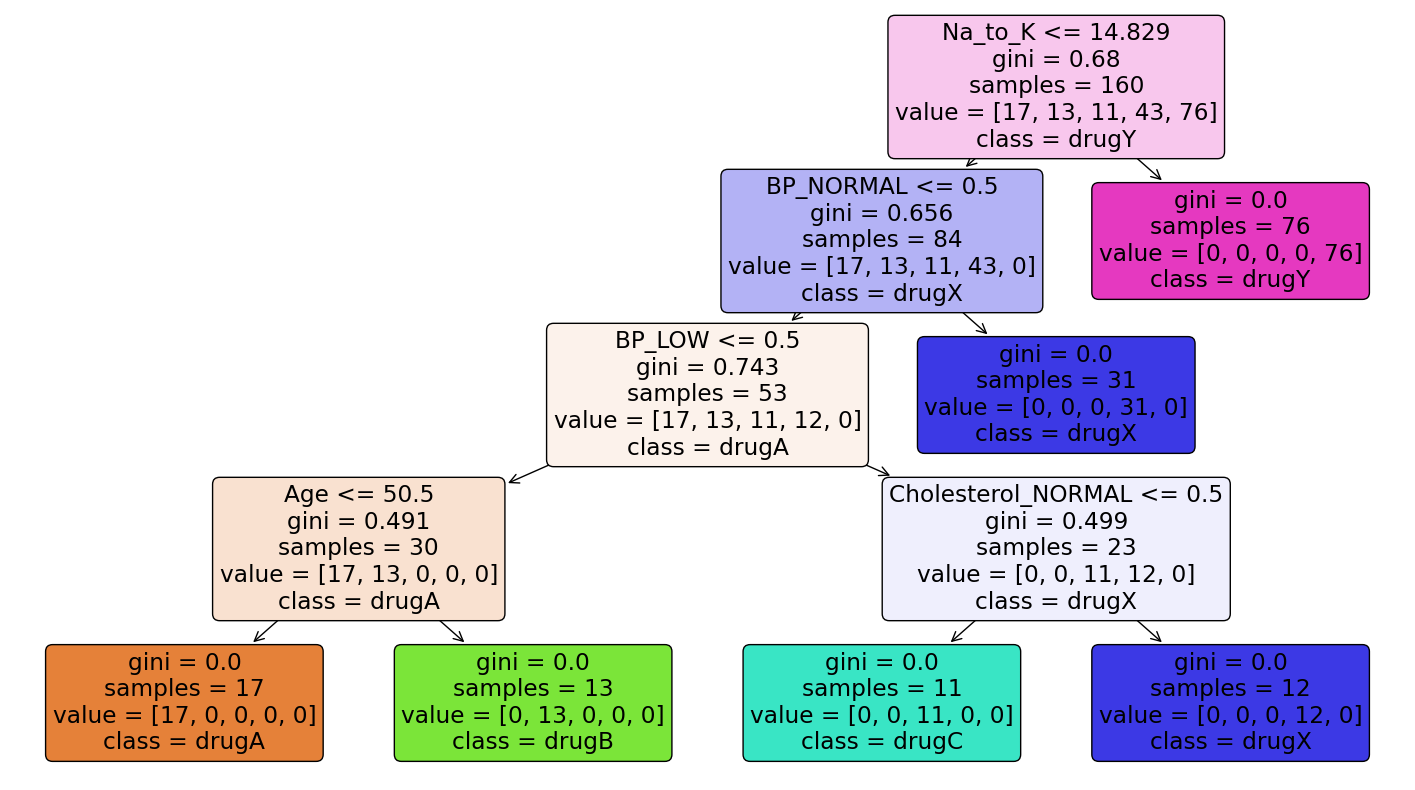

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

model = pipeline.named_steps["model"]

encoded_features = pipeline.named_steps["preprocessing"] \
    .named_transformers_["cat"] \
    .get_feature_names_out(["Sex", "BP", "Cholesterol"])

all_features = list(encoded_features) + ["Age", "Na_to_K"]

# 4️⃣ Plot tree
plt.figure(figsize=(18,10))
plot_tree(
    model,
    feature_names=all_features,
    class_names=model.classes_,
    filled=True,
    rounded=True
)
plt.show()


Train Accuracy: 0.8375
Test Accuracy: 0.8
Cross Validation Scores: [0.85  0.825 0.85  0.8   0.825]
Mean CV Accuracy: 0.8300000000000001


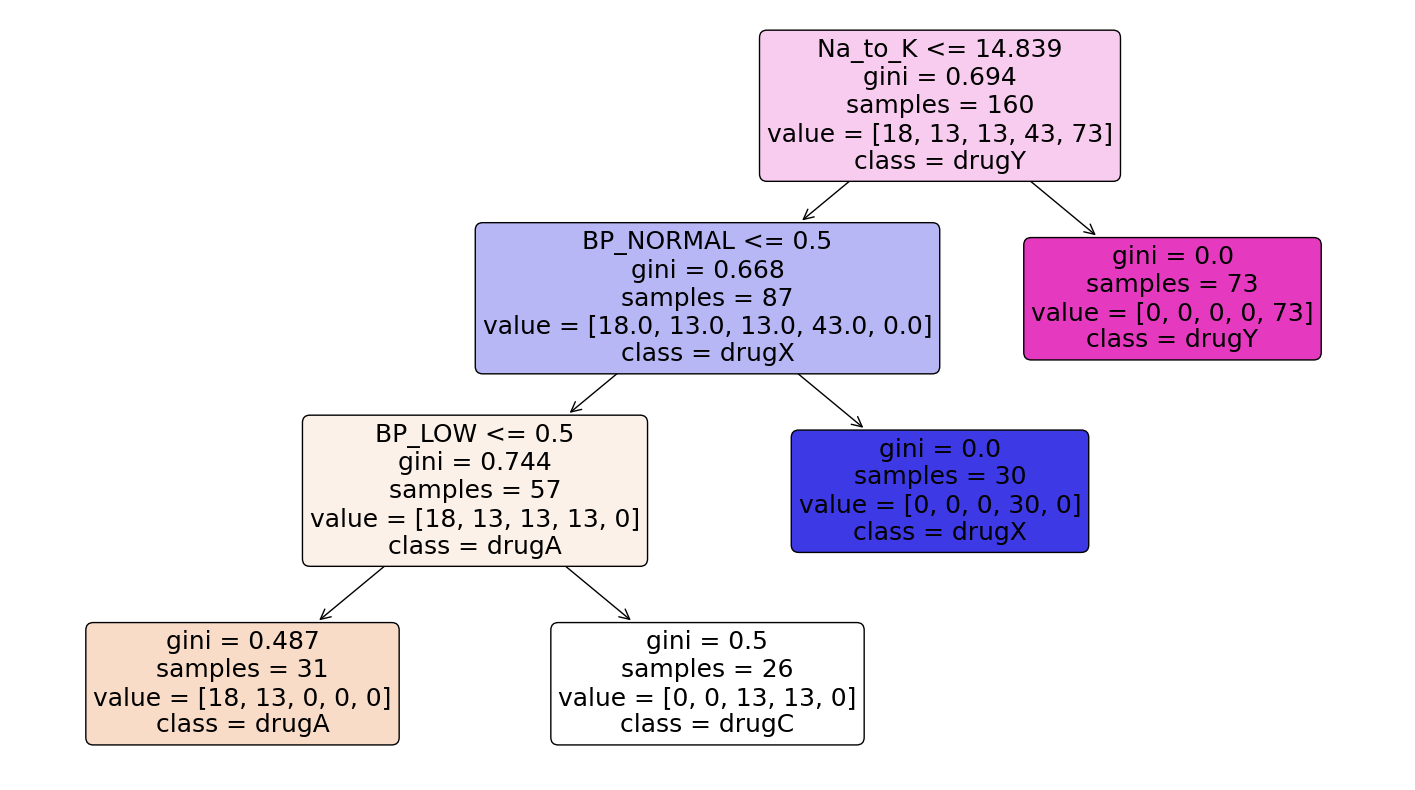

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score


X = df.drop("Drug", axis=1)
y = df["Drug"]

cat_cols = ["Sex", "BP", "Cholesterol"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), cat_cols)
    ],
    remainder="passthrough"
)

pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", DecisionTreeClassifier(
        max_depth=3,              # control overfitting
        min_samples_split=5,
        random_state=42
    ))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipeline.fit(X_train, y_train)

train_acc = pipeline.score(X_train, y_train)
test_acc = pipeline.score(X_test, y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

cv_scores = cross_val_score(pipeline, X, y, cv=5)
print("Cross Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

model = pipeline.named_steps["model"]

encoded_features = pipeline.named_steps["preprocessing"] \
    .named_transformers_["cat"] \
    .get_feature_names_out(cat_cols)

all_features = list(encoded_features) + ["Age", "Na_to_K"]

plt.figure(figsize=(18,10))
plot_tree(
    model,
    feature_names=all_features,
    class_names=model.classes_,
    filled=True,
    rounded=True
)
plt.show()
